# 1. Import Library

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
import statsmodels.api as sm
from category_encoders import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import plotly.graph_objs as go
from plotly.offline import iplot

# 2. Data Loading & Splitting

In [3]:
# Load dataset
df = pd.read_csv('breast_cancer.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1347749,1,1,1,1,2,1,1,1,1,2
1,1277629,5,1,1,1,2,1,2,2,1,2
2,1270479,5,1,3,3,2,2,2,3,1,2
3,809912,10,3,3,1,2,10,7,6,1,4
4,1113061,5,1,1,1,2,1,3,1,1,2


In [5]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [6]:
# Size of Dataset
R = df.shape[0]
C = df.shape[1]
print(f"Number of rows: {R}")
print(f"Number of columns: {C}")

Number of rows: 699
Number of columns: 11


In [7]:
# Get testing data
df_test = df.iloc[:R//5, :]
df_test.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1347749,1,1,1,1,2,1,1,1,1,2
1,1277629,5,1,1,1,2,1,2,2,1,2
2,1270479,5,1,3,3,2,2,2,3,1,2
3,809912,10,3,3,1,2,10,7,6,1,4
4,1113061,5,1,1,1,2,1,3,1,1,2


In [8]:
# Display the shape
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 139
Number of columns: 11


In [9]:
# Get training data
df_train = df.iloc[R//5:, :]
df_train.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
139,1197080,4,1,1,1,2,1,3,2,1,2
140,1334667,1,1,1,1,2,1,1,1,1,2
141,1313325,4,10,4,7,3,10,9,10,1,4
142,1238410,2,3,1,1,3,1,1,1,1,2
143,1189266,7,2,4,1,6,10,5,4,3,4


In [10]:
# Display the shape
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 560
Number of columns: 11


# 3. EDA & Data Preprocessing

### 3.1 Training Data

In [11]:
# Size of Dataset
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 560
Number of columns: 11


In [12]:
# Drop unnecessary columns
df_train = df_train.drop(['Sample code number'], axis=1)
df_train = df_train.reset_index(drop=True)
df_train.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [13]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [14]:
# Check for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              560 non-null    int64 
 1   Uniformity of Cell Size      560 non-null    int64 
 2   Uniformity of Cell Shape     560 non-null    int64 
 3   Marginal Adhesion            560 non-null    int64 
 4   Single Epithelial Cell Size  560 non-null    int64 
 5   Bare Nuclei                  560 non-null    object
 6   Bland Chromatin              560 non-null    int64 
 7   Normal Nucleoli              560 non-null    int64 
 8   Mitoses                      560 non-null    int64 
 9   Class                        560 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 43.9+ KB


In [15]:
# Remove row with missing values
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              560 non-null    int64 
 1   Uniformity of Cell Size      560 non-null    int64 
 2   Uniformity of Cell Shape     560 non-null    int64 
 3   Marginal Adhesion            560 non-null    int64 
 4   Single Epithelial Cell Size  560 non-null    int64 
 5   Bare Nuclei                  560 non-null    object
 6   Bland Chromatin              560 non-null    int64 
 7   Normal Nucleoli              560 non-null    int64 
 8   Mitoses                      560 non-null    int64 
 9   Class                        560 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 43.9+ KB


In [16]:
# # Rename columns
# headers = ["IP mean", "IP std", "IP excess kurtosis",
#            "IP skewness", "DM-SNR mean", "DM-SNR std", "DM-SNR excess kurtosis",
#            "DM-SNR skewness", "Target class"]
# df_train.columns = headers
# df_train.columns

In [17]:
# Drop duplicated rows
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])

Number of duplicated rows: 187

Removing duplicates...

Number of duplicated rows: 0


In [19]:
# Show unique values on each X's columns
X = df_train.drop(['Class'], axis=1)

for col in X.columns:
    print(X[col].value_counts())

Clump Thickness
5     79
3     50
1     48
10    47
4     41
8     34
6     25
2     23
7     15
9     11
Name: count, dtype: int64
Uniformity of Cell Size
1     133
10     51
3      37
2      37
4      31
5      25
6      22
8      20
7      13
9       4
Name: count, dtype: int64
Uniformity of Cell Shape
1     119
10     44
2      42
3      38
4      36
6      28
5      21
7      21
8      18
9       6
Name: count, dtype: int64
Marginal Adhesion
1     150
2      46
3      42
10     39
4      27
8      21
6      18
5      14
7      12
9       4
Name: count, dtype: int64
Single Epithelial Cell Size
2     146
3      57
6      35
4      34
5      29
10     24
1      24
8      15
7       7
9       2
Name: count, dtype: int64
Bare Nuclei
1     151
10    102
2      22
3      21
5      19
8      17
4      15
?       9
9       7
7       6
6       4
Name: count, dtype: int64
Bland Chromatin
3     76
2     68
1     66
7     56
4     30
5     28
8     18
10    14
9      9
6      8
Name: count, dt

In [20]:
# # Drop poor features (to avoid overfitting)
# df_train = df_train.drop(['VendorID'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['payment_type'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [21]:
# Remove X's invalid row
df_train = df_train[df_train["Bare Nuclei"] != "?"]

X = df_train.drop(['Class'], axis=1)

for col in X.columns:
    print(X[col].value_counts())

Clump Thickness
5     79
3     48
10    47
1     43
4     40
8     33
6     25
2     23
7     15
9     11
Name: count, dtype: int64
Uniformity of Cell Size
1     126
10     51
3      37
2      37
4      30
5      25
6      21
8      20
7      13
9       4
Name: count, dtype: int64
Uniformity of Cell Shape
1     115
10     44
2      41
4      36
3      36
6      28
7      21
5      19
8      18
9       6
Name: count, dtype: int64
Marginal Adhesion
1     142
2      46
3      42
10     39
4      27
8      21
6      17
5      14
7      12
9       4
Name: count, dtype: int64
Single Epithelial Cell Size
2     141
3      56
6      35
4      34
5      29
10     24
1      22
8      15
7       6
9       2
Name: count, dtype: int64
Bare Nuclei
1     151
10    102
2      22
3      21
5      19
8      17
4      15
9       7
7       6
6       4
Name: count, dtype: int64
Bland Chromatin
3     75
1     64
2     64
7     55
4     29
5     28
8     18
10    14
9      9
6      8
Name: count, dtype: int64

In [18]:
# Check invalid datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              373 non-null    int64 
 1   Uniformity of Cell Size      373 non-null    int64 
 2   Uniformity of Cell Shape     373 non-null    int64 
 3   Marginal Adhesion            373 non-null    int64 
 4   Single Epithelial Cell Size  373 non-null    int64 
 5   Bare Nuclei                  373 non-null    object
 6   Bland Chromatin              373 non-null    int64 
 7   Normal Nucleoli              373 non-null    int64 
 8   Mitoses                      373 non-null    int64 
 9   Class                        373 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 29.3+ KB


In [22]:
# Change the data type of X's invalid columns
df_train["Bare Nuclei"] = df_train["Bare Nuclei"].astype("int64")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 372
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              364 non-null    int64
 1   Uniformity of Cell Size      364 non-null    int64
 2   Uniformity of Cell Shape     364 non-null    int64
 3   Marginal Adhesion            364 non-null    int64
 4   Single Epithelial Cell Size  364 non-null    int64
 5   Bare Nuclei                  364 non-null    int64
 6   Bland Chromatin              364 non-null    int64
 7   Normal Nucleoli              364 non-null    int64
 8   Mitoses                      364 non-null    int64
 9   Class                        364 non-null    int64
dtypes: int64(10)
memory usage: 31.3 KB


In [23]:
# Show unique values on y's column
y = df_train['Class']

print(y.value_counts())

Class
2    183
4    181
Name: count, dtype: int64


In [24]:
# # Remove y's invalid row
# df_train = df_train[df_train["Bare Nuclei"] != "?"]

# y = df_train['Class']

# for col in X.columns:
#     print(X[col].value_counts())

In [25]:
# # Change the data type of y's invalid column
# df_train["Bare Nuclei"] = df_train["Bare Nuclei"].astype("int64")
# df_train.info()

<Axes: >

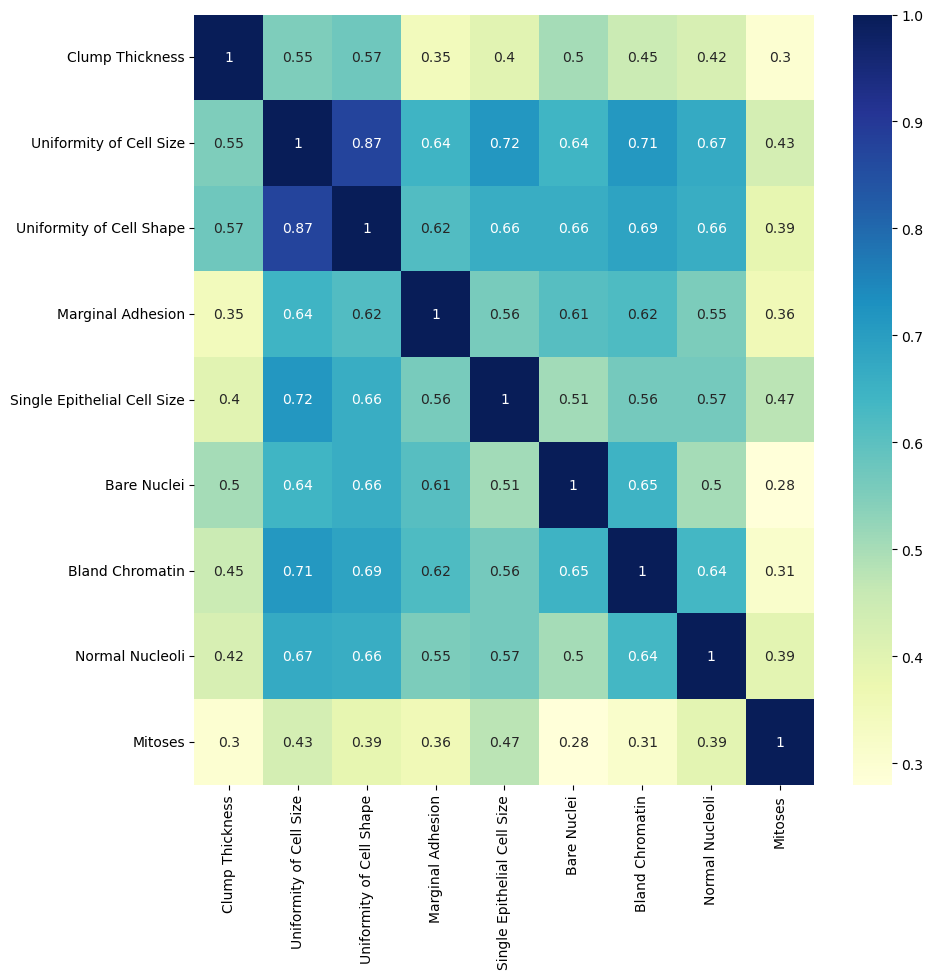

In [ ]:
# Displaying heatmap
X = df_train.drop(['Class'], axis=1)

plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(method="pearson"), cmap="YlGnBu", annot=True)

In [27]:
# # Drop correlated features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

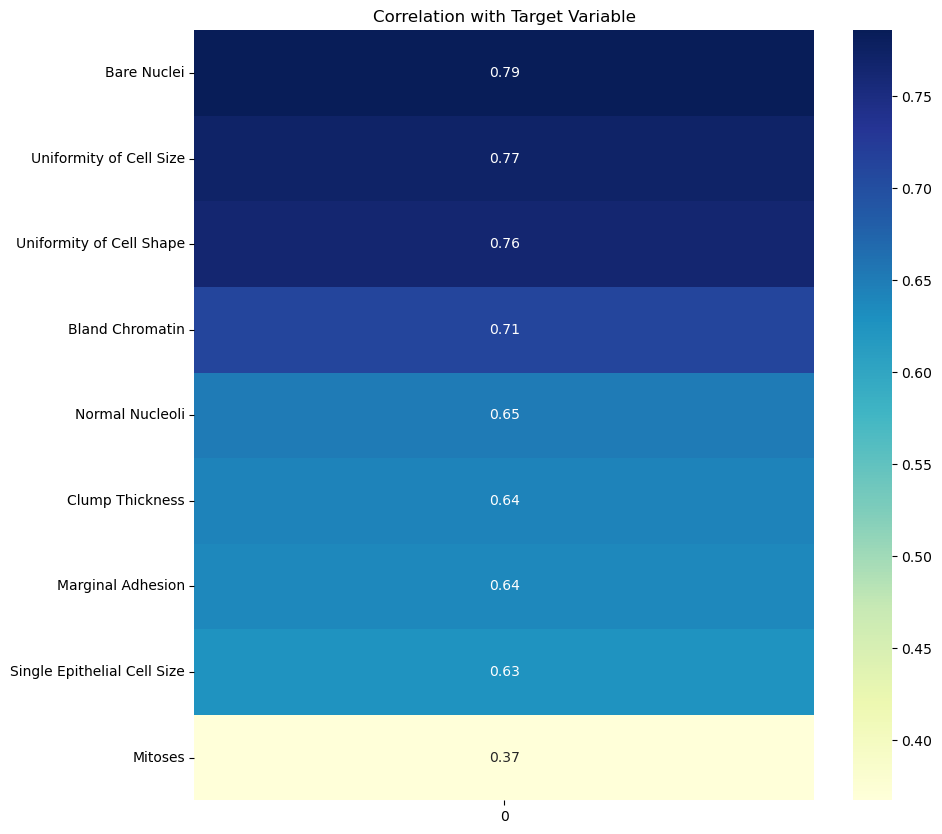

In [ ]:
# Create a correlation matrix with target variable
X = df_train.drop(['Class'], axis=1)
y = df_train['Class']

corr_with_target = X.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_with_target.to_frame(), cmap='YlGnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

In [29]:
# # Drop unimportant features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [30]:
# Show categorical columns
categorical_cols = list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))

print("Categorical columns:")
print(sorted(categorical_cols))

Categorical columns:
[]


In [31]:
# # Show unique values in categorical columns
# unique_values = []

# for col in categorical_cols:
#     unique_value = [col]
#     unique_value.append(", ".join(df_train[col].unique()))
#     unique_values.append(unique_value)

# pd.DataFrame(unique_values, columns=["col", "unique values"])

In [32]:
# # Encode categorical columns using OrdinalEncoder

# enc_maps = {
#     "buying price" : [{'col': "buying price", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "maintenance cost" : [{'col': "maintenance cost", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "number of doors" : [{'col': "number of doors", 'mapping': {"2": 0, "3": 1, "4": 2, "more": 3}}],
#     "number of persons" : [{'col': "number of persons", 'mapping': {"2": 0, "4": 1, "more": 2}}],
#     "luggage boot" : [{'col': "luggage boot", 'mapping': {"small": 0, "medium": 1, "big": 2}}],
#     "safety" : [{'col': "safety", 'mapping': {"low": 0, "medium": 1, "high": 2}}],
#     "decision" : [{'col': "decision", 'mapping': {"unaccepted": 0, "accepted": 1, "good": 2, "very good": 3}}]
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_train = enc.fit_transform(df_train)


# df_train

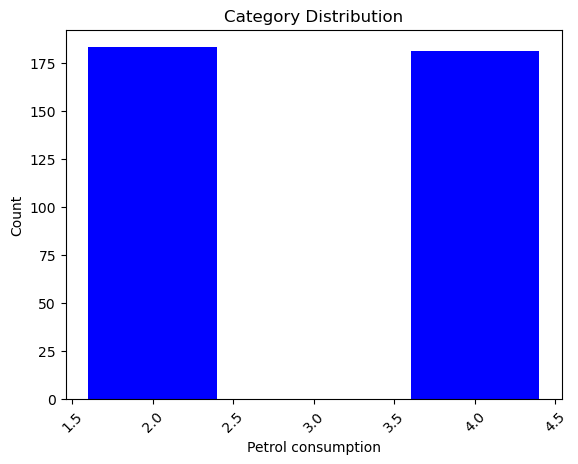

In [33]:
# Distribution of target variable
category_counts = df_train['Class'].value_counts()

# Plot the count plot
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Petrol consumption')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

**Important**: We detect outliers BEFORE creating polynomial features because:
1. Polynomial features amplify outliers exponentially (outlier² creates extreme values)
2. One outlier affects multiple polynomial features simultaneously  
3. This prevents model instability in polynomial regression

Do it when the data is sufficient

In [34]:
# Show all numerical columns
numerical_columns = list(df_train.select_dtypes(include=[np.number]).columns.values)
numerical_columns

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

In [35]:
# Detect outliers
def detect_outliers_iqr(df, column):    
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

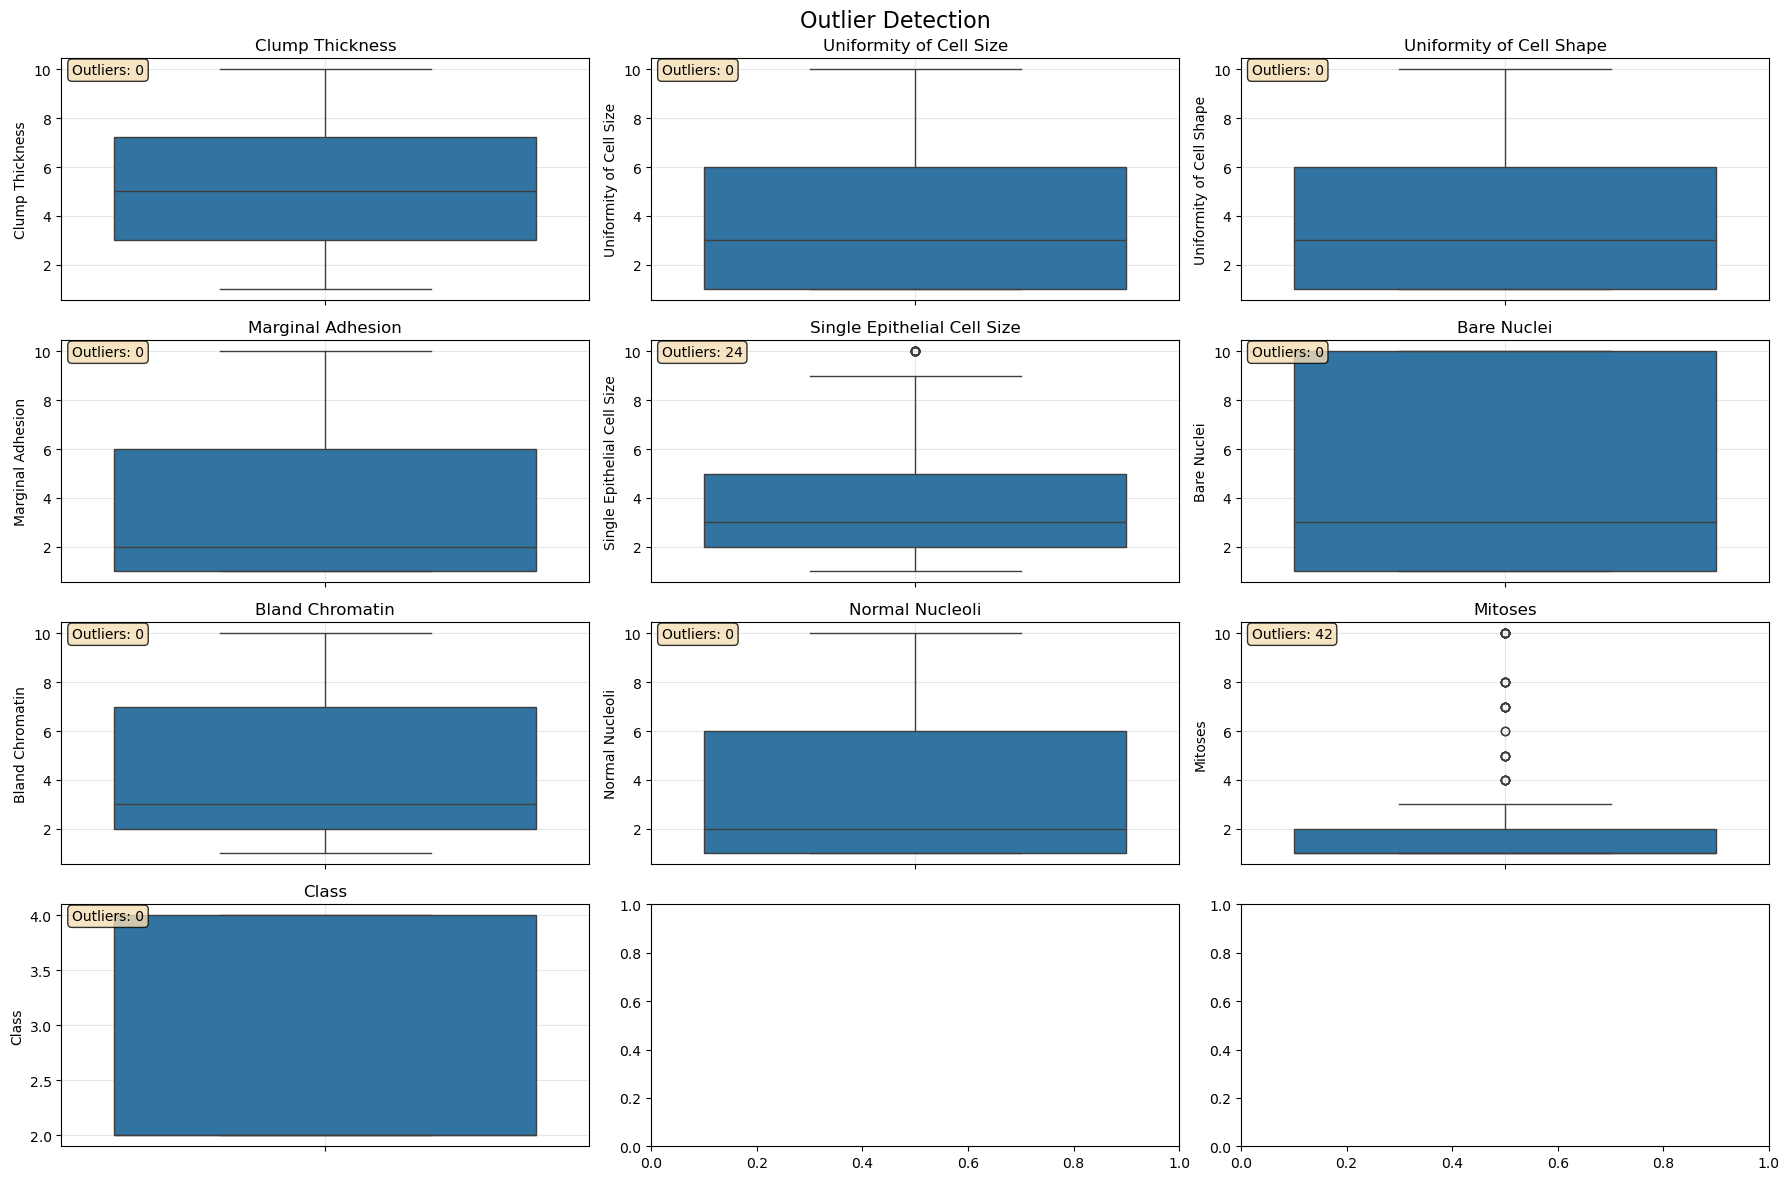

In [36]:
# Create box plots for all numerical features to visualize outliers
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection', fontsize=16)

lower_bounds = dict()
upper_bounds = dict()

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    
    # Create box plot
    sns.boxplot(data=df_train, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add outlier count as text
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_train, col)
    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound
    
    axes[row, col_idx].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col_idx].transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [37]:
# # Remove outliers based on IQR method (only if the dataset is big enough)
# for i, col in enumerate(numerical_columns):
    
#     df_train = df_train[df_train[col] >= lower_bounds[col]]
#     df_train = df_train.reset_index(drop=True)
#     df_train = df_train[df_train[col] <= upper_bounds[col]]
#     df_train = df_train.reset_index(drop=True)

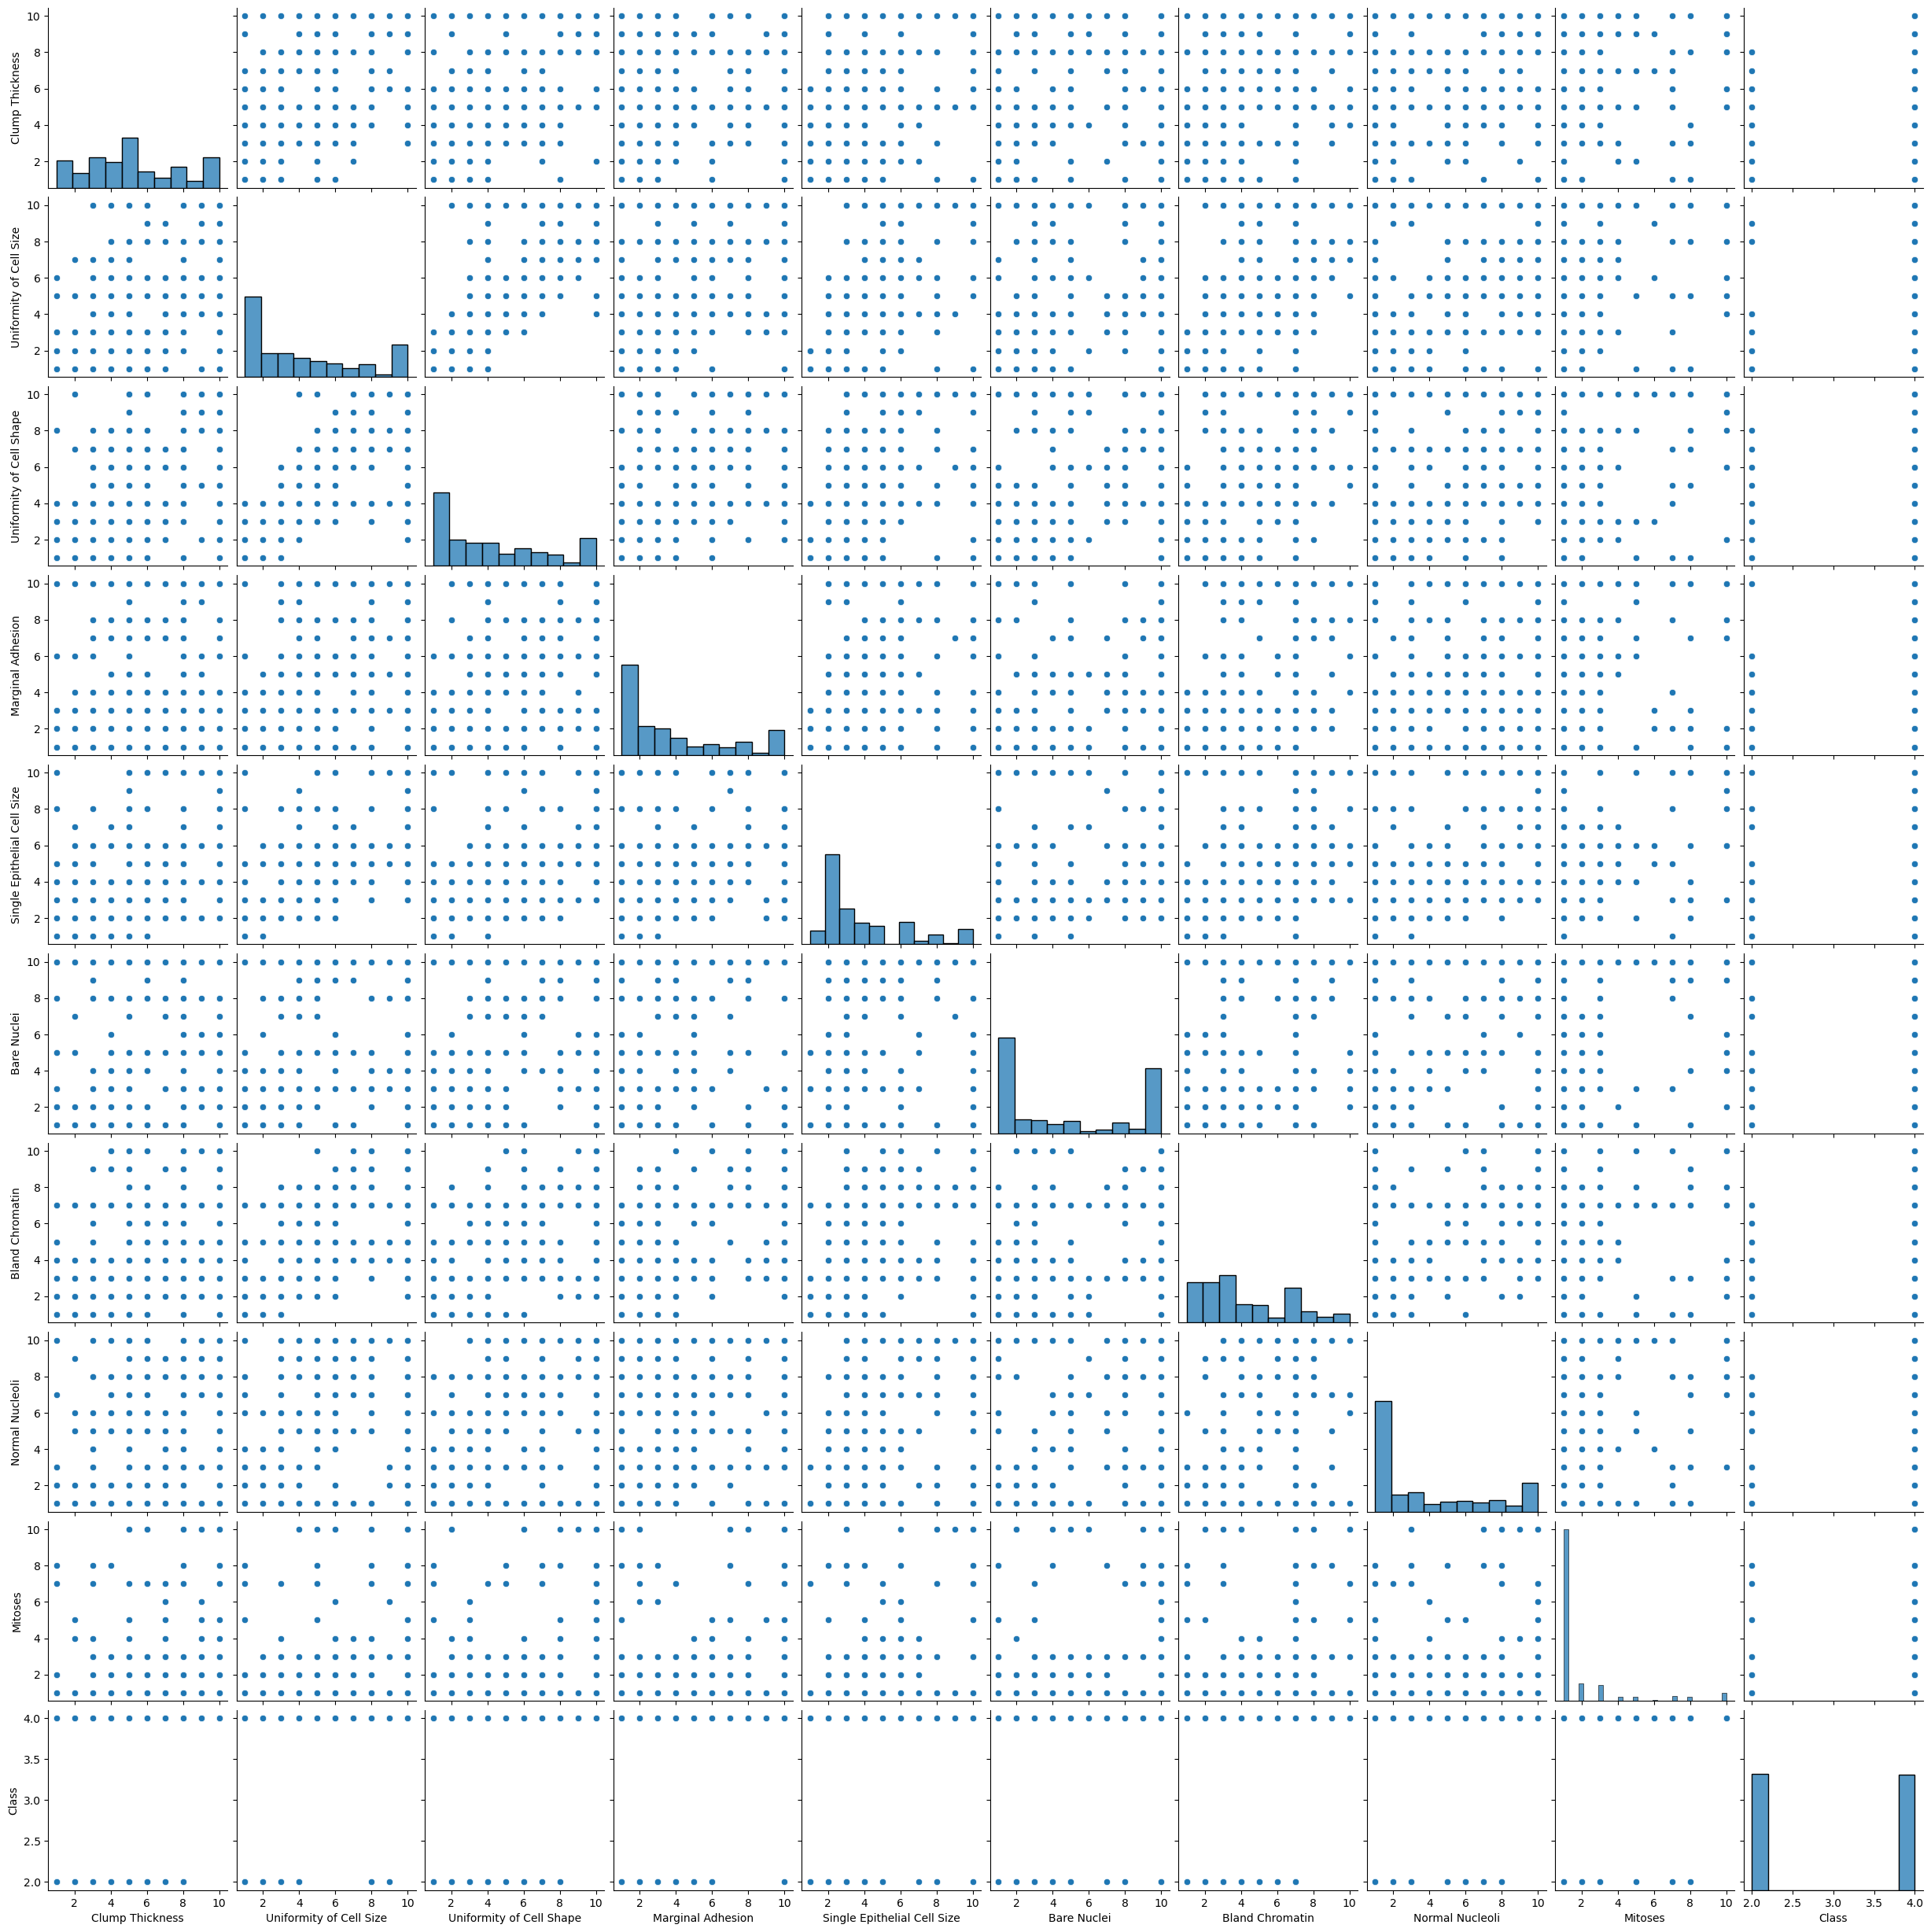

In [38]:
# Show the distribution of all columns
sns.pairplot(df_train)

In [39]:
# Show statistical information of the dataset
df_train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,5.153846,4.063187,4.112637,3.620879,3.799451,4.664835,4.041209,3.662088,1.945055,2.994505
std,2.802687,3.235285,3.137080,3.097000,2.450816,3.897838,2.612948,3.332550,2.155716,1.001361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,5.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,7.250000,6.000000,6.000000,6.000000,5.000000,10.000000,7.000000,6.000000,2.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [40]:
# Separate features and labels
y_train = df_train['Class']
X_train = df_train.drop(['Class'], axis=1)

In [41]:
# # MinMax Scaling
# numeric_cols = X_train.select_dtypes(include='number').columns

# scaler_X = MinMaxScaler()
# scaler_Y = MinMaxScaler()

# X_train[numeric_cols] = scaler_X.fit_transform(X_train[numeric_cols])
# y_train = scaler_Y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# pd.DataFrame(y_train, columns=['Target class'])

### 3.2 Testing Data

In [42]:
# Size of Dataset
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 139
Number of columns: 11


In [43]:
# Drop unnecessary columns
df_test = df_test.drop(['Sample code number'], axis=1)
df_test = df_test.reset_index(drop=True)
df_test.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [44]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [45]:
# Remove row with missing values
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              139 non-null    int64 
 1   Uniformity of Cell Size      139 non-null    int64 
 2   Uniformity of Cell Shape     139 non-null    int64 
 3   Marginal Adhesion            139 non-null    int64 
 4   Single Epithelial Cell Size  139 non-null    int64 
 5   Bare Nuclei                  139 non-null    object
 6   Bland Chromatin              139 non-null    int64 
 7   Normal Nucleoli              139 non-null    int64 
 8   Mitoses                      139 non-null    int64 
 9   Class                        139 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 11.0+ KB


In [46]:
# # Rename columns
# headers = ["IP mean", "IP std", "IP excess kurtosis",
#            "IP skewness", "DM-SNR mean", "DM-SNR std", "DM-SNR excess kurtosis",
#            "DM-SNR skewness", "Target class"]
# df_test.columns = headers
# df_test.columns

In [47]:
# # Drop poor features (to avoid overfitting)
# df_train = df_train.drop(['VendorID'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['payment_type'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [48]:
# Remove X's invalid row
df_test = df_test[df_test["Bare Nuclei"] != "?"]

X = df_test.drop(['Class'], axis=1)

for col in X.columns:
    print(X[col].value_counts())

Clump Thickness
1     27
5     22
10    22
3     20
4     12
8     11
7      8
6      5
2      4
9      2
Name: count, dtype: int64
Uniformity of Cell Size
1     64
3     14
10    14
4      8
2      8
8      8
7      6
5      5
6      4
9      2
Name: count, dtype: int64
Uniformity of Cell Shape
1     59
3     13
10    12
5     12
2     10
8      9
7      9
4      7
6      1
9      1
Name: count, dtype: int64
Marginal Adhesion
1     74
10    16
3     11
5      9
2      8
4      6
8      4
6      4
7      1
Name: count, dtype: int64
Single Epithelial Cell Size
2     70
4     14
3     13
5     10
10     6
8      5
6      5
7      5
1      5
Name: count, dtype: int64
Bare Nuclei
1     68
10    28
5     11
2      8
3      7
4      4
8      3
7      2
9      2
Name: count, dtype: int64
Bland Chromatin
3     34
2     27
1     23
7     14
8     10
4     10
10     6
5      6
9      2
6      1
Name: count, dtype: int64
Normal Nucleoli
1     76
10    15
3      9
2      7
4      6
6      5
9     

In [49]:
# Change the data type of X's invalid columns
df_test["Bare Nuclei"] = df_test["Bare Nuclei"].astype("int64")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133 entries, 0 to 138
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              133 non-null    int64
 1   Uniformity of Cell Size      133 non-null    int64
 2   Uniformity of Cell Shape     133 non-null    int64
 3   Marginal Adhesion            133 non-null    int64
 4   Single Epithelial Cell Size  133 non-null    int64
 5   Bare Nuclei                  133 non-null    int64
 6   Bland Chromatin              133 non-null    int64
 7   Normal Nucleoli              133 non-null    int64
 8   Mitoses                      133 non-null    int64
 9   Class                        133 non-null    int64
dtypes: int64(10)
memory usage: 11.4 KB


In [50]:
# # Remove y's invalid row
# df_test = df_test[df_test["Bare Nuclei"] != "?"]

# y = df_test['Class']

# for col in X.columns:
#     print(X[col].value_counts())

In [51]:
# # Change the data type of y's invalid column
# df_test["Bare Nuclei"] = df_test["Bare Nuclei"].astype("int64")
# df_test.info()

In [52]:
# # Drop correlated features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [53]:
# # Drop unimportant features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [54]:
# # Encode categorical columns using OrdinalEncoder
# categorical_cols = list(set(df_test.columns.to_list()) - set(df_test._get_numeric_data().columns.to_list()))

# enc_maps = {
#     "buying price" : [{'col': "buying price", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "maintenance cost" : [{'col': "maintenance cost", 'mapping': {"low": 0, "medium": 1, "high": 2, "very high": 3}}],
#     "number of doors" : [{'col': "number of doors", 'mapping': {"2": 0, "3": 1, "4": 2, "more": 3}}],
#     "number of persons" : [{'col': "number of persons", 'mapping': {"2": 0, "4": 1, "more": 2}}],
#     "luggage boot" : [{'col': "luggage boot", 'mapping': {"small": 0, "medium": 1, "big": 2}}],
#     "safety" : [{'col': "safety", 'mapping': {"low": 0, "medium": 1, "high": 2}}],
#     "decision" : [{'col': "decision", 'mapping': {"unaccepted": 0, "accepted": 1, "good": 2, "very good": 3}}]
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_test = enc.fit_transform(df_test)


# df_test

In [55]:
# Separate features and labels
y_test = df_test['Class']
X_test = df_test.drop(['Class'], axis=1)

In [56]:
# # MinMax Scaling
# numeric_cols = X_test.select_dtypes(include='number').columns

# scaler_X = MinMaxScaler()
# scaler_Y = MinMaxScaler()

# X_test[numeric_cols] = scaler_X.fit_transform(X_test[numeric_cols])
# y_test = scaler_Y.fit_transform(y_test.values.reshape(-1, 1)).flatten()
# pd.DataFrame(y_test, columns=['Class'])

# 4. KNN-C

In [57]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [58]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

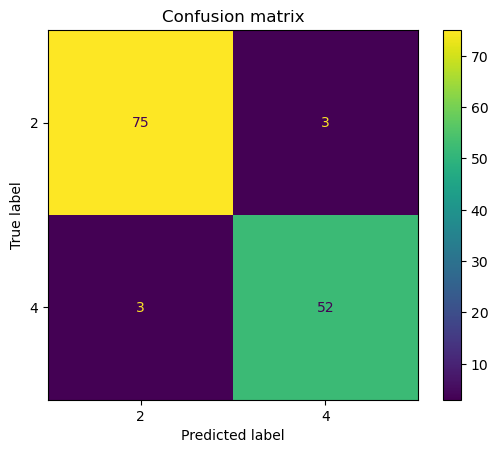

Training acc score: 0.9615384615384616
Training null acc: 0.5027472527472527

Testing acc score: 0.9548872180451128
Testing null acc: 0.5864661654135338

              precision    recall  f1-score   support

           2       0.96      0.96      0.96        78
           4       0.95      0.95      0.95        55

    accuracy                           0.95       133
   macro avg       0.95      0.95      0.95       133
weighted avg       0.95      0.95      0.95       133



In [59]:
# Model evaluation

def evaluate_model(model, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    cm = multilabel_confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in y.unique()])
    disp.plot()
    plt.title("Confusion matrix")
    plt.show()
    print("Training acc score:", accuracy_score(y_train, y_train_pred))
    print("Training null acc:", y_train.value_counts().max() / len(y_train))
    print()
    print("Testing acc score:", accuracy_score(y_test, y_pred))
    print("Testing null acc:", y_test.value_counts().max() / len(y_test))
    print()
    print(classification_report(y_pred,y_test))

evaluate_model(model, X_test, y_test)

# 5. Tuning

In [60]:
base_model = KNeighborsClassifier()

params = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
}

grid_search = GridSearchCV(estimator=base_model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [61]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
CPU times: total: 109 ms
Wall time: 3.9 s


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [62]:
score_df = pd.DataFrame(grid_search.cv_results_)

In [63]:
trace0 = go.Scatter(
    y = score_df['mean_test_score'],
    x = np.arange(1,len(score_df['mean_test_score'])+1), 
    mode = 'lines+markers', 
    marker = dict(
        color = 'rgb(150, 10, 10)'
    )
)
layout = go.Layout(
    title = '', 
    xaxis = dict(
        title = 'K value', 
        tickmode = 'linear'
    ),
    yaxis = dict(
        title = 'Score',
#         range = [0, 10000]
    )
)
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig, filename='basic-line')

In [64]:
score_df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
4,0.002386,0.000422,0.006277,0.000557,5,{'n_neighbors': 5},0.989011,0.978022,0.901099,0.967033,0.958791,0.034203,1
6,0.002637,0.000657,0.008297,0.002284,7,{'n_neighbors': 7},0.989011,0.989011,0.890110,0.967033,0.958791,0.040656,1
7,0.002761,0.000439,0.008042,0.001578,8,{'n_neighbors': 8},0.989011,0.967033,0.901099,0.967033,0.956044,0.032967,3
8,0.002510,0.000510,0.007273,0.001087,9,{'n_neighbors': 9},0.989011,0.967033,0.901099,0.967033,0.956044,0.032967,3
10,0.002650,0.001390,0.007282,0.000434,15,{'n_neighbors': 15},0.989011,0.967033,0.901099,0.967033,0.956044,0.032967,3
5,0.002508,0.001118,0.009752,0.002897,6,{'n_neighbors': 6},0.978022,0.967033,0.901099,0.967033,0.953297,0.030469,6
9,0.002132,0.000216,0.006400,0.000646,10,{'n_neighbors': 10},0.978022,0.967033,0.901099,0.967033,0.953297,0.030469,6
2,0.003004,0.000355,0.008856,0.002952,3,{'n_neighbors': 3},0.978022,0.945055,0.912088,0.967033,0.950549,0.025179,8
11,0.002129,0.000955,0.006657,0.000656,20,{'n_neighbors': 20},0.989011,0.945055,0.890110,0.967033,0.947802,0.036756,9
3,0.002510,0.000930,0.007407,0.001033,4,{'n_neighbors': 4},0.978022,0.934066,0.901099,0.967033,0.945055,0.030095,10


In [65]:
best_params = grid_search.best_estimator_
best_params

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


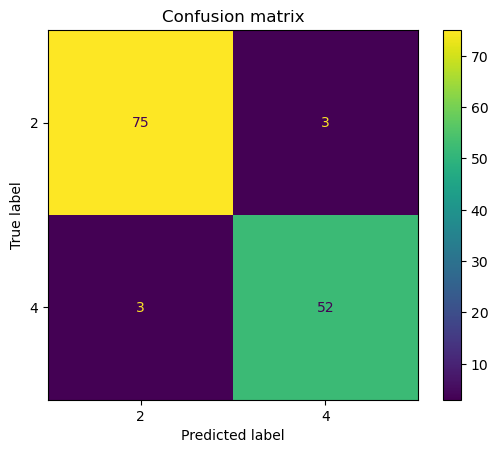

Training acc score: 0.9615384615384616
Training null acc: 0.5027472527472527

Testing acc score: 0.9548872180451128
Testing null acc: 0.5864661654135338

              precision    recall  f1-score   support

           2       0.96      0.96      0.96        78
           4       0.95      0.95      0.95        55

    accuracy                           0.95       133
   macro avg       0.95      0.95      0.95       133
weighted avg       0.95      0.95      0.95       133



In [66]:
# Evaluate the best model
evaluate_model(best_params, X_test, y_test)

# 6. Testing Model (if test dataset exists)